<h1 align="center">Análise de dados de e-commerce utilizando Machine Learning</h1>


<center>Neste documento, vamos fazer uma <b>análise exploratória completa</b>, utilizando <b>Python</b>, <b>Power Bi</b> e <b>Machine Learning</b>.<center>


<img src="https://img.shields.io/badge/Python-3.10.0%2B-orange" alt="drawing" width="80"/>

[![](https://img.shields.io/badge/Apache-License-green)](https://github.com/rgizsilva/Analise-de-dados-acidentes-rodoviarios/blob/main/LICENSE)

[![](https://img.shields.io/badge/Linkedin-Reginaldo-blue )](https://www.linkedin.com/in/rgiz/)

<center><img src="https://raw.githubusercontent.com/rgizsilva/Analise_dados_ecommerce/main/analise-de-ecommerce.png" alt="drawing" width="850"/><center>

------

## O processo de análise será feito seguindo os tópicos:

 * <b>Obtenção dos dados</b> 
 * <b>Extração e limpeza dos dados (ETL)</b>
 * <b>Análise exploratória com Python</b>
 * <b>Análise Corporativa utilizando Power Bi</b>
 * <b>Análise de linguagem natural utilizando automação e Machine Learning</b>  
 * <b>Modelo de algorítimo de predição de faturamento utilizando Machine Learning</b> 

 

----


## Obtenção dos dados

Para esse projeto, desenvolvi um banco de dados relacionais simples utilizando **MySQL**. Em seguida, utilizei o serviço *RDS* da **AWS** para hospedar o banco de dados em um servidor na nuvem como veremos a seguir :


<center><img src="https://raw.githubusercontent.com/rgizzzzzzz/testes/main/eer.JPG" alt="drawing" width="400"/><center>

<center><img src="https://raw.githubusercontent.com/rgizzzzzzz/testes/main/mysql1.JPG" alt="300" width="200"/><center>

<center><img src="https://raw.githubusercontent.com/rgizzzzzzz/testes/main/mysql2.JPG" alt="300" width="300"/><center>

<center><img src="https://raw.githubusercontent.com/rgizzzzzzz/testes/main/amazzon.JPG" alt="300" width="600"/><center>

Agora, vamos fazer a conexão do servidor com nosso notebook utilizando a biblioteca **mysql.connector**

In [1]:
# Importando a biblioteca
import mysql.connector
# importando biblioteca warnings para ignorar os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fazendo a conexão com o servidor na nuvem
conn = mysql.connector.connect(host='projeto-ecommerce.cghea0nbxedi.sa-east-1.rds.amazonaws.com',database='vendas',user='admin',password='81397848')
cursor = conn.cursor()
if conn.is_connected():
    print("Conectado ao servidor!")

Conectado ao servidor!


----

## Extração e limpeza dos dados (ETL)

Vamos utilizar a biblioteca **Pandas** para obter e transformar nosso banco de dados em um *Data frame* para ser analisado. Nossa primeira análise é checar os tipos de variáveis, checar possíveis dados nulos ou inconsistências nos dados e fazer as devidas correções se for necessário.

In [3]:
# Importando a biblioteca Pandas
import pandas as pd

In [4]:
# Transformando o banco de dados em um Data frame e checando seu schema
query=("SELECT * FROM information_schema.tables WHERE table_schema = 'vendas';")
inf_df = pd.read_sql(query,conn)
inf_df

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE,ENGINE,VERSION,ROW_FORMAT,TABLE_ROWS,AVG_ROW_LENGTH,DATA_LENGTH,...,INDEX_LENGTH,DATA_FREE,AUTO_INCREMENT,CREATE_TIME,UPDATE_TIME,CHECK_TIME,TABLE_COLLATION,CHECKSUM,CREATE_OPTIONS,TABLE_COMMENT
0,def,vendas,cliente,BASE TABLE,InnoDB,10,Dynamic,60,273,16384,...,0,0,61.0,2022-12-21 02:11:30,None,None,utf8mb4_0900_ai_ci,None,,
1,def,vendas,pagamento,BASE TABLE,InnoDB,10,Dynamic,3,5461,16384,...,0,0,4.0,2022-12-17 21:06:56,None,None,utf8mb4_0900_ai_ci,None,,
2,def,vendas,pedido,BASE TABLE,InnoDB,10,Dynamic,80,204,16384,...,49152,0,NaN,2022-12-21 02:01:59,None,None,utf8mb4_0900_ai_ci,None,,
3,def,vendas,produto,BASE TABLE,InnoDB,10,Dynamic,15,1092,16384,...,0,0,16.0,2022-12-17 21:06:52,None,None,utf8mb4_0900_ai_ci,None,,


In [5]:
# checando as tabelas 
query=("SHOW TABLES FROM vendas;")
inf_df = pd.read_sql(query,conn)
inf_df

,Tables_in_vendas
0,cliente
1,pagamento
2,pedido
3,produto


Vamos realizar uma *query* com *JOIN* para unir todas as tabelas com seus relacionamentos em um único *Data frame* para continuar com as análises.

In [6]:
query=("SELECT * FROM pedido AS p JOIN cliente AS c ON c.id = p.cliente_id JOIN pagamento AS pa ON pa.id = p.pagamento_id JOIN produto AS pro ON pro.id =p.produto_id;")
df = pd.read_sql(query,conn)
df

,cliente_id,pagamento_id,data_pedido,entrega_prevista,entrega_efetuada,produto_id,quantidade_produto,frete,id,nome_cliente,...,codigo_boleto,nome_cartao,numero_cartao,data_validade_cartao,id,nome,categoria,descricao,valor,avaliacao
0,1,1,2021-11-01,2021-11-10,2021-11-10,1,2,15.0,1,José,...,None,None,None,None,1,Smartphone Sansung Galaxy s20,celular,celular novo 2022...,2000.0,4
1,4,1,2021-11-03,2021-11-11,2021-11-12,4,1,25.0,4,Carlos,...,None,None,None,None,4,Pc Sansgung gamer,computador,computador gamer,2500.0,5
2,6,1,2021-11-05,2021-11-13,2021-11-13,6,2,25.0,6,Maria,...,None,None,None,None,6,Tv Semp,tv,"tv 43""...",2500.0,2
3,9,1,2021-11-10,2021-11-16,2021-11-16,9,1,25.0,9,Gabriel,...,None,None,None,None,9,TV lcd,tv,"tv 48""...",3000.0,5
4,11,1,2021-11-12,2021-11-19,2021-11-19,11,2,15.0,11,Lucia,...,None,None,None,None,11,Notebook dell inspiration,notebook,notebook gamer...,2040.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,42,3,2022-01-18,2022-01-28,2022-01-28,12,1,15.0,42,Yago,...,None,None,None,None,12,Pc Acer,computador,comnputador uso pessoal...,1400.0,1
76,43,3,2022-01-19,2022-01-28,2022-01-28,13,1,15.0,43,Yasmin,...,None,None,None,None,13,Robo aspirador Sansug,aspirador,aspira e limpa...,1050.0,3
77,58,3,2022-02-24,2022-03-05,2022-03-05,3,1,15.0,58,Camilah,...,None,None,None,None,3,Robo aspirador Eos,aspirador,"limpa,aspira...",1000.0,3
78,8,3,2022-03-24,2022-04-05,2022-04-05,3,1,15.0,8,Josué,...,None,None,None,None,3,Robo aspirador Eos,aspirador,"limpa,aspira...",1000.0,3


In [7]:
# checando os tipos de dados das colunas 
df.dtypes

cliente_id                int64
pagamento_id              int64
data_pedido              object
entrega_prevista         object
entrega_efetuada         object
produto_id                int64
quantidade_produto        int64
frete                   float64
id                        int64
nome_cliente             object
idade                     int64
endereco                 object
cidade                   object
estado                   object
id                        int64
tipo                     object
codigo_pix               object
codigo_boleto            object
nome_cartao              object
numero_cartao            object
data_validade_cartao     object
id                        int64
nome                     object
categoria                object
descricao                object
valor                   float64
avaliacao                 int64
dtype: object

Variáveis com tipos de dados corretos.

In [8]:
#vamos checar e tratar os dados nulos
df.isnull().sum().sort_values(ascending= False)

data_validade_cartao    80
numero_cartao           80
nome_cartao             80
codigo_boleto           80
codigo_pix              80
cliente_id               0
id                       0
valor                    0
descricao                0
categoria                0
nome                     0
id                       0
tipo                     0
estado                   0
pagamento_id             0
cidade                   0
endereco                 0
idade                    0
nome_cliente             0
id                       0
frete                    0
quantidade_produto       0
produto_id               0
entrega_efetuada         0
entrega_prevista         0
data_pedido              0
avaliacao                0
dtype: int64

In [9]:
#vamos eliminar as colunas com dados nulos
df = df.dropna(how='any', axis=1)

In [10]:
#vamos filtrar apenas as colunas necessárias para continuar a análise
df = df[['cliente_id','nome_cliente','idade','estado','data_pedido','entrega_prevista','entrega_efetuada','quantidade_produto','frete','nome','valor','tipo']]

In [11]:
#vamos fazer uma descrição estatística dos dados numéricos
df.describe()

,cliente_id,idade,quantidade_produto,frete,valor
count,80.000000,80.000000,80.000000,80.000000,80.00000
mean,27.262500,25.787500,1.200000,17.750000,2409.00000
std,18.151782,4.220786,0.402524,4.493314,1933.89919
min,1.000000,18.000000,1.000000,15.000000,800.00000
25%,10.750000,22.000000,1.000000,15.000000,1050.00000
50%,24.500000,25.000000,1.000000,15.000000,2000.00000
75%,43.250000,30.000000,1.000000,25.000000,3000.00000
max,60.000000,34.000000,2.000000,25.000000,10000.00000


**Podemos ver algumas informações:**
- A média de idade entre os clientes é **25 anos**
- O máximo de produto em uma venda foi de **2 unidades**
- O valor mínimo de custo de frete foi de **15,00 reais**
- O produto mais barato vendido custa **800,00** e o mais caro **10.000.00 reais**

Vamos ver para quais estados tiveram mais vendas. Vamos usar a biblioteca *matplotlib* e *seaborn* para plotar **gráficos**.

In [12]:
# Importando bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

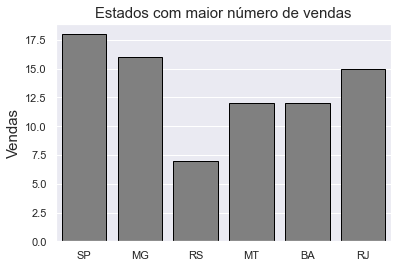

In [13]:
# Usando Matplotlib para plotar um gráfico
plot = sns.countplot(x = df['estado'],color='gray',edgecolor='black')
plt.ylabel('Vendas',fontsize=15)
plt.xlabel('',fontsize=15)
plt.title("Estados com maior número de vendas",fontsize=15)
for t in plot.texts:
    t.set_visible(False)


Agora vamos ver quais foram os **produtos mais vendidos**:

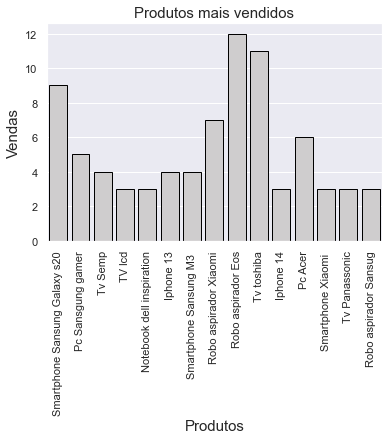

In [15]:
# Usando Matplotlib para plotar um gráfico
plot = sns.countplot(x = df['nome'],color='#CFCDCE',edgecolor='black')
plt.ylabel('Vendas',fontsize=15)
plt.xlabel('Produtos',fontsize=15)
plt.title("Produtos mais vendidos",fontsize=15)
plt.xticks(rotation = 90)
for t in plot.texts:
    t.set_visible(False)

## Análise Corporativa utilizando Power Bi

Com nosso banco de dados já exportado para o **Power Bi**, criei um *Dashboard* de análises respondendo as seguintes *kpi's* :

- **Faturamento Total**
- **Número de vendas**
- **Ticket Médio**
- **Média de idade dos clientes**
- **Lead de vendas**(quanto tempo leva em dias uma entrega entre a data do pedido e a data da entrega)
- **Atraso nas entregas**
- **Filtros**(categoria/mês/ano)
- **Faturamento por tipo de pagamento**(boleto, pix ou cartão de crédito)
- **Faturamento/lucro por estados**


In [16]:
# importando bibliotecas do powerbiclient
from powerbiclient import Report,models
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [17]:
# realizando login no site da Microsoft
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ETSZXLH76 to authenticate.

Device flow authentication successfully completed.
You are now logged in.


In [18]:
# instanciando token
access_token = device_auth.get_access_token()

In [19]:
# definindo endereço do Dashboard 
group_id= "2b2eb63d-7900-43a8-993b-81689ae80524"
report_id = "8e18cce1-45c0-4e30-afc9-668826fc9b88"

In [20]:
# criando report do para o Dashboard
report = Report(group_id=group_id,report_id=report_id,auth=device_auth)

In [21]:
report

Report()

AttributeError: 'DeviceCodeLoginAuthentication' object has no attribute '_client_id'

## Análise de linguagem natural utilizando automação e Machine Learning

Uma boa prática para uma empresa saudável é entender e ouvir os clientes. Fazer um pós-relacionamento e resolver as reclamações é fundamental para o nome da empresa. Pensando na melhoria do relacionamento com o cliente utilizando a computação, vamos criar um **algoritmo de linguagem natural** utilizando uma **automação** que nos permite filtrar o título de todas as últimas reclamações sobre a empresa no site **Reclame Aqui** e transformá-las em um dicionário de palavras para criar um gráfico de **nuvem de palavras**. Com isso, conseguimos ver quais são as palavras mais usadas e assim entender qual é o tipo de reclamação mais frequente. 

Como estamos analisando um projeto fictício de e-commerce, vou utilizar as reclamações da página do site *Magalu.com*, **apenas para fim didático**.

In [27]:
#importando bibliotecas
from selenium import webdriver
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from time import sleep

Vamos utilizar a biblioteca **selenium** para criar uma automação web utilizando o navegador *Mozilla Firefox* e fazer extração dos dados no site do Reclame Aqui.





In [56]:
url_num = 1
rec=[]
try:
    while url_num<15:
        url = 'https://www.reclameaqui.com.br/empresa/magazine-luiza-loja-online/lista-reclamacoes/?pagina={}'.format(url_num)
        firefox_profile = webdriver.FirefoxProfile()
        options = webdriver.FirefoxOptions()
        firefox_profile.set_preference('permissions.default.image', 2)
        firefox_profile.set_preference('dom.ipc.plugins.enabled.libflashplayer.so', 'false')
        options.headless = False
        driver = webdriver.Firefox(firefox_profile=firefox_profile,options=options)
        driver.get(url)
        numero = 1
        while numero<11:
            titulo = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[{}]/a/h4'.format(numero)).text
            rec.append(titulo)
            numero+=1
            sleep(2)
        print("Página {} completa".format(url_num))
        url_num+=1
        driver.quit()
except:
    #RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
    #WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:182:5
    #StaleElementReferenceError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:463:5
    #element.resolveElement@chrome://remote/content/marionette/element.sys.mjs:674:11
    #evaluate.fromJSON@chrome://remote/content/marionette/evaluate.sys.mjs:255:31
    #evaluate.fromJSON@chrome://remote/content/marionette/evaluate.sys.mjs:263:29
    #receiveMessage@chrome://remote/content/marionette/actors/MarionetteCommandsChild.sys.mjs:74:34
    pass 
print("raspagem completa")
    

Página 1 completa
Página 2 completa
Página 3 completa
Página 4 completa
Página 5 completa
Página 6 completa
Página 7 completa
Página 8 completa
Página 9 completa
Página 10 completa
Página 11 completa
Página 12 completa
Página 13 completa
Página 14 completa
raspagem completa


In [ ]:
# separando todas as frases em palavras para usar no gráfico
all_rec = " ".join(s for s in rec)
print(all_rec)

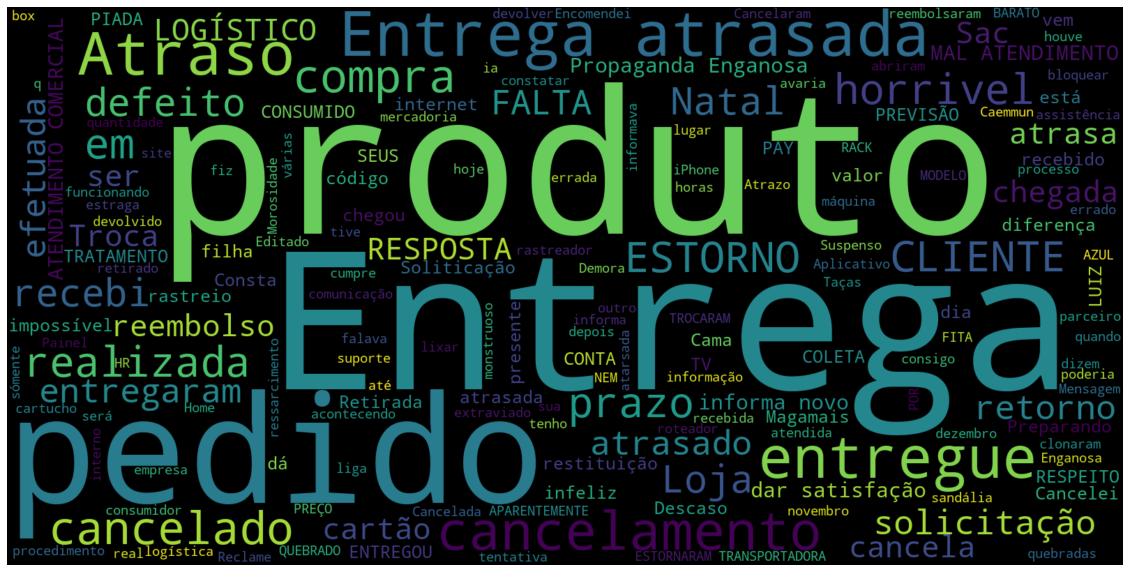

In [58]:
# adicionando palavras a serem removidas do gráfico
stopwords = set(STOPWORDS)
stopwords.update(["meu","nao","não","minha","é","e","a","o","de","uma","fizeram","do","eles","mas",
                  "da","de","foi","sem","pra","para","como","mais","na","no","sem","como","era","sem",
                  "fica","um","dois","estou","comprei","pós","após","mesmo","número","falou","falam",
                  "magalu","magazine","luiza","pedi","veio","aqui","pelo","pé",
                 "que","espero","mas","saiu","dias","tem","apos","já","tem","logo","fiquei","pago","paguei"])
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="black",width=1600,height=800).generate(all_rec)
# criando imagem para o gráfico
fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud,interpolation='bilinear')
ax.set_axis_off()

Como vimos na imagem acima, a **nuvem de palavras** nos ajuda a visualizar as reclamações mais frequentes para melhorar no atendimento ao cliente.

## Modelo de algorítimo de predição de faturamento utilizando Machine Learning

Vamos criar agora um algoritmo de predição utilizando Machine Learning, para isso vamos usar o modelo de **arvore de decisão** da biblioteca *scikit-learn*

In [233]:
# Importando a bilbioteca 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


Para esse algoritmo, vamos importar uma segunda base de dados, uma planilha do **Excel** com  3 informações: **id do cliente**, a **nota que ele deu para a experiência da compra** e se ele **voltou a fazer um novo pedido na a loja**.

A ideia do algoritmo, é conseguir prever baseado nas *variáveis* **idade**, **tipo de pagamento** e **nota da experiência com a primeira compra** se ele vai voltar a fazer uma nova compra, assim conseguimos criar uma expectativa de novos faturamentos futuros para a loja.

In [357]:
# Importando nova base de dados
planilha = pd.read_excel("tabela_analise.xlsx")

In [358]:
# visualizando os dados 
planilha.head(5)

,cliente_id,Nota_exp,Voltou_comprar
0,1,3,S
1,2,2,N
2,3,2,N
3,4,5,S
4,5,5,S


In [359]:
#removendo e setando índice
planilha.set_index("cliente_id").head(5)

,Nota_exp,Voltou_comprar
cliente_id,,
1,3,S
2,2,N
3,2,N
4,5,S
5,5,S


In [509]:
# contatenando as duas bases de dados 
dados = pd.merge(df,planilha,on='cliente_id')

# definindo os nossos rótulos que serão usados no nosso modelo de predição
dados = dados[["idade","tipo","Nota_exp","Voltou_comprar"]]

dados

In [183]:

import plotly.express as px

In [196]:
px.box(dados,x='Voltou_comprar')

In [510]:
dados= dados.replace({'S':1})


In [511]:
dados = dados.replace({'N':0})

In [512]:
dados

,idade,tipo,Nota_exp,Voltou_comprar
0,25,b,3,1
1,25,p,3,1
2,23,b,5,1
3,23,b,5,1
4,25,b,4,1
...,...,...,...,...
75,28,c,3,1
76,22,c,4,1
77,21,c,5,1
78,23,c,1,0


In [513]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import svm
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder

In [514]:
one_hot_enc=OneHotEncoder(cols='tipo')

In [515]:
dados= one_hot_enc.fit_transform(dados)

In [516]:
a = dados.drop(['Voltou_comprar'], axis=1)
feature_names = dados.columns.values
b = dados.Voltou_comprar

In [517]:
dados

,idade,tipo_1,tipo_2,tipo_3,Nota_exp,Voltou_comprar
0,25,1,0,0,3,1
1,25,0,1,0,3,1
2,23,1,0,0,5,1
3,23,1,0,0,5,1
4,25,1,0,0,4,1
...,...,...,...,...,...,...
75,28,0,0,1,3,1
76,22,0,0,1,4,1
77,21,0,0,1,5,1
78,23,0,0,1,1,0


In [484]:
a_test

,idade,tipo_1,tipo_2,tipo_3,Nota_exp
41,20,0,1,0,2
46,30,0,1,0,2
26,25,1,0,0,3
32,30,0,1,0,2
35,22,0,1,0,4
65,33,0,1,0,2
21,24,1,0,0,2
3,23,1,0,0,5
37,30,0,1,0,3
19,34,1,0,0,3


In [518]:
target_names = {'S':[1],'N':[0]}

In [546]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.50, random_state=3)

In [547]:
n_neighbors = 3

In [548]:
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

In [549]:
clf.fit(a_train,b_train)

KNeighborsClassifier(n_neighbors=3)

In [550]:
y_pred = clf.predict(a_test)

In [551]:
print(classification_report(b_test,y_pred,target_names= target_names))

              precision    recall  f1-score   support

           S       0.75      0.69      0.72        13
           N       0.86      0.89      0.87        27

    accuracy                           0.82        40
   macro avg       0.80      0.79      0.80        40
weighted avg       0.82      0.82      0.82        40



In [405]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [406]:
b_test

29    0
47    0
13    0
54    1
44    0
67    1
51    1
48    1
17    1
69    0
30    1
70    0
0     1
23    1
9     0
20    1
41    0
60    1
42    0
63    1
77    1
27    1
34    1
12    0
35    1
32    0
36    1
55    0
7     1
38    0
39    1
53    1
24    0
61    0
18    0
75    1
11    1
56    0
3     1
79    1
45    1
6     1
46    0
40    1
14    1
64    1
58    1
59    1
28    0
21    0
19    0
52    1
71    1
16    1
74    0
4     1
Name: Voltou_comprar, dtype: int64

In [502]:
clf=svm.SVC(C=1.00)

In [503]:
clf.fit(a_train,b_train)

SVC()

In [504]:
y_pred= clf.predict(a_test)

In [505]:
print(classification_report(b_test,y_pred,target_names= target_names))

              precision    recall  f1-score   support

           S       0.00      0.00      0.00         9
           N       0.62      1.00      0.77        15

    accuracy                           0.62        24
   macro avg       0.31      0.50      0.38        24
weighted avg       0.39      0.62      0.48        24



In [225]:
X = dados.drop(['Voltou_comprar'], axis=1)
feature_names = dados.columns.values
y = dados.Voltou_comprar

In [226]:
ordinal_features = ['Voltou_comprar']
nominal_features= list(set(X.select_dtypes(include='object').columns.values) - set(ordinal_features))
numerical_features = X.select_dtypes(exclude='object').columns.values

In [227]:
numerical_transformer = SimpleImputer(strategy='median')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, numerical_features),
                    ('cat_nom', nominal_transformer, nominal_features),
                    ('ord_nom', ordinal_transformer, ordinal_features)
                ])

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('minmaxscaler', MinMaxScaler()),
        ('stdscaler',  StandardScaler()),
        ('regressor', DecisionTreeRegressor(random_state=0, criterion='mse'))
    
])

In [231]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=3)

In [232]:
pipe.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [230]:
dados

,idade,tipo,Nota_exp,Voltou_comprar
cliente_id,,,,
1,25,b,3,S
1,25,p,3,S
4,23,b,5,S
4,23,b,5,S
6,25,b,4,S
...,...,...,...,...
32,28,c,3,S
41,22,c,4,S
42,21,c,5,S


In [2]:
!pip install mysql-connector-python
!pip install selenium
!pip install wordcloud
!pip install time
!pip install powerbiclient



ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [3]:
import pandas as pd
import mysql.connector
from selenium import webdriver
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from time import sleep
from IPython.display import IFrame
from powerbiclient import Report,models

In [65]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication


In [5]:
!pip install jupyter_contrib_nbextensions

In [8]:
access_token = device_auth.get_access_token()

In [9]:
group_id= "2b2eb63d-7900-43a8-993b-81689ae80524"
report_id = "8e18cce1-45c0-4e30-afc9-668826fc9b88"

In [19]:
report = Report(group_id=group_id,report_id=report_id,auth=device_auth)

In [18]:
report

Report()

AttributeError: 'DeviceCodeLoginAuthentication' object has no attribute '_client_id'

AttributeError: 'DeviceCodeLoginAuthentication' object has no attribute '_client_id'

AttributeError: 'DeviceCodeLoginAuthentication' object has no attribute '_client_id'

AttributeError: 'DeviceCodeLoginAuthentication' object has no attribute '_client_id'

In [58]:
IFrame(src="https://app.powerbi.com/reportEmbed?reportId=3b721c55-ad17-4721-b3bf-c9bdfc15fdbb&autoAuth=true&ctid=7c52ad07-78f5-4808-b518-7777301459a0",height=500, width=1600)

In [208]:
url = 'https://www.reclameaqui.com.br/empresa/magazine-luiza-loja-online/lista-reclamacoes/?status=ANSWERED'
options = webdriver.FirefoxOptions()
options.headless = False
driver = webdriver.Firefox(executable_path=r'‪C:\firefox gecko\geckodriver.exe',options=options)
driver.get(url)
numero = 1
rec=[]
for numero in range(5):
    numero = 1
    titulo = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[{}]/a/h4'.format(numero)).text
    rec.append(titulo)
    
    


    



    

C:\Users\Regi\AppData\Local\Temp\ipykernel_16536\904149020.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'‪C:\firefox gecko\geckodriver.exe',options=options)


NoSuchElementException: Message: Unable to locate element: //*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[0]/a/h4
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:182:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:394:5
element.find/</<@chrome://remote/content/marionette/element.sys.mjs:275:16


In [102]:
print(rec)

['Entrega era para dia 20/12', 'Entrega atrasada', 'Atraso na entrega', 'ETREGA ATRASADA A QUASE UM MÊS', 'demora da entrega do produto', 'Pedido veio faltando pela segunda vez', 'Entrega atrasada', 'Não consigo usar a garantia', 'Não recebi o produto', 'Troca sem sucesso', 'COLETA ATRASADA / PRODUTO COM DEFEITO', 'Propaganda enganosa ou produto errado?', 'Produto nao libera para retirada', 'Entrega de produto atrasado', 'atraso na entrega', 'Produto adquirido não entregue e sem estorno do valor pago', 'Entrega atrasada', 'Pedido não entregue', 'Reembolso não feito', 'Comprei 2 aparelhos de ar condicionado e não entregaram no prazo combinado', 'mercadoria nao entregue', 'Comprei dois ventiladores de Teto da marca Ventisol', 'Problema no rastreio.', 'Restorno quase impossivel', 'Reembolso do valor pago', 'Atrasado até no cancelamento', 'mercadoria nao entregue', 'direito a desistência de compra (art. 49 do código de defesa do consumidor) [Editado pelo Reclame Aqui]', 'Várias tentativas 

In [103]:
all_rec = " ".join(s for s in rec)
print(all_rec)

Entrega era para dia 20/12 Entrega atrasada Atraso na entrega ETREGA ATRASADA A QUASE UM MÊS demora da entrega do produto Pedido veio faltando pela segunda vez Entrega atrasada Não consigo usar a garantia Não recebi o produto Troca sem sucesso COLETA ATRASADA / PRODUTO COM DEFEITO Propaganda enganosa ou produto errado? Produto nao libera para retirada Entrega de produto atrasado atraso na entrega Produto adquirido não entregue e sem estorno do valor pago Entrega atrasada Pedido não entregue Reembolso não feito Comprei 2 aparelhos de ar condicionado e não entregaram no prazo combinado mercadoria nao entregue Comprei dois ventiladores de Teto da marca Ventisol Problema no rastreio. Restorno quase impossivel Reembolso do valor pago Atrasado até no cancelamento mercadoria nao entregue direito a desistência de compra (art. 49 do código de defesa do consumidor) [Editado pelo Reclame Aqui] Várias tentativas de troca e ainda não solucionado Pedido atrasado e demora do reembolso PEDIDO EM ATRAS

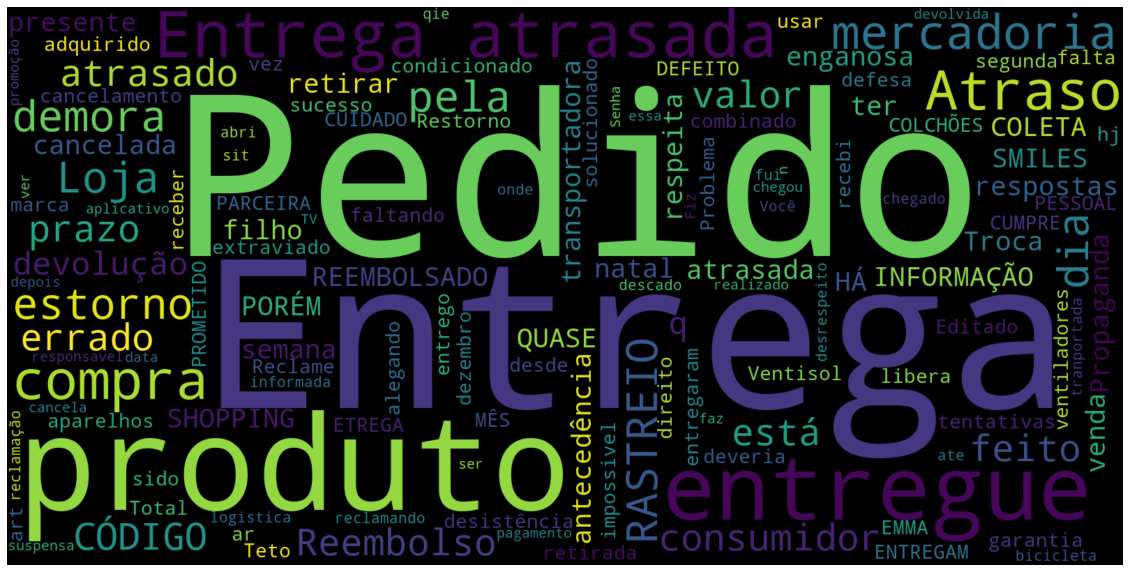

In [104]:
stopwords = set(STOPWORDS)
stopwords.update(["meu","nao","não","minha","é","e","a","o","de","uma","fizeram","do","eles","mas",
                  "da","de","foi","sem","pra","para","como","mais","na","no","sem","como","era","sem",
                  "fica","um","dois","estou","comprei","pós","após","mesmo","número","falou","falam",
                  "magalu","magazine","luiza","pedi","veio","aqui","pelo","pé",
                 "que","espero","mas","saiu","dias","tem","apos","já","tem","logo","fiquei","pago","paguei",
                  "ou","até","ainda","codigo","sobre","se","várias","dar","ao","consigo","pegar","nada","em" ])
all_rec = " ".join(s for s in rec)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="black",width=1600,height=800).generate(all_rec)

fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud,interpolation='bilinear')
ax.set_axis_off()

In [ ]:
//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[5]/a/h4

In [78]:
//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[1]/a/h4

In [187]:
rec=[]
url_num = 1
for url in range(4):
    url = 'https://www.reclameaqui.com.br/empresa/magazine-luiza-loja-online/lista-reclamacoes/?pagina={}'.format(url_num)
    options = webdriver.FirefoxOptions()
    options.headless = False
    driver = webdriver.Firefox(executable_path=r'‪C:\firefox gecko\geckodriver.exe',options=options)
    driver.get(url)
    numero = 1
    for numero in range(5):
        numero= numero+1
        titulo = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[{}]/a/h4'.format(numero)).text
        rec.append(titulo)
    urlnum
    

C:\Users\Regi\AppData\Local\Temp\ipykernel_16536\3678091541.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'‪C:\firefox gecko\geckodriver.exe',options=options)


In [82]:
url_num = 1
rec=[]
try :
    while url_num<2:
        url = 'https://www.reclameaqui.com.br/empresa/magazine-luiza-loja-online/lista-reclamacoes/?pagina={}'.format(url_num)
        options = webdriver.FirefoxOptions()
        options.headless = True
        driver = webdriver.Firefox(executable_path=r'‪C:\firefox gecko\geckodriver.exe',options=options)
        driver.get(url)
        numero = 1
        while numero<11:
            titulo = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[{}]/a/h4'.format(numero)).text
            rec.append(titulo)
            numero+=1
            sleep(2)
        print("Página {} completa".format(url_num))
        url_num+=1
        sleep(5)
except :
    #RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
    #WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:182:5
    #StaleElementReferenceError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:463:5
    #Message: The element reference of <h4 class="sc-1pe7b5t-1 fTrwHU"> is stale; either the element is no longer attached to the DOM, it is not in the current frame context, or the document has been refreshed 
    pass 
print("raspagem completa")
    

raspagem completa


haha


[<html lang="pt-BR"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>viacao sao bento - Pesquisa Google</title><script nonce="VzwtH_zZ60Bb4ctDUlT2ag">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};va
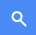
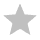
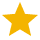
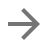
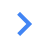
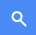
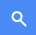
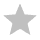
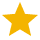
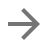
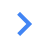
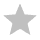
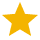
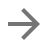
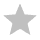
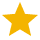
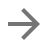
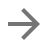
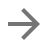
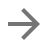
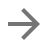
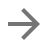
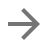
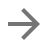
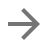
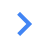

In [ ]:
 titulo = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[1]/div[3]/main/section[2]/div[2]/div[2]/div[{}]/a/h4'.format(numero)).text
    print(titulo)

In [37]:
con = mysql.connector.connect(host='database-1.cghea0nbxedi.sa-east-1.rds.amazonaws.com',database='vendas',user='admin',password='81397848')
cursor = con.cursor()
if con.is_connected():
    print("Conectado ao servidor!")

Conectado ao servidor!


In [41]:
query=("SELECT * FROM pedido ;")
df = pd.read_sql(query,con)
novo = pd.DataFrame(df)


C:\Users\Regi\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [47]:
novo.drop('produto_id',axis=1,inplace=True)

SyntaxError: invalid syntax (2085447041.py, line 1)

<iframe title="analise_completa - Página 1" width="600" height="373.5" src="https://app.powerbi.com/view?r=eyJrIjoiYWI5Y2ZhZDctMWEwOS00Y2YyLTg0ZDMtYjE1MjllYTEyZDMwIiwidCI6IjdjNTJhZDA3LTc4ZjUtNDgwOC1iNTE4LTc3NzczMDE0NTlhMCJ9" frameborder="0" allowFullScreen="true"></iframe>


In [27]:
df2 = pd.read_excel(r"D:\Users\Regi\Downloads\tabela_analise.xlsx")

df2.set_index('id_cliente')

,Nota_exp,Voltou_comprar
id_cliente,,
1,3,S
2,2,N
3,2,N
4,5,S
5,5,S
6,4,S
7,3,S
8,2,N
9,2,S
